# Part I - Borrower's Annual Percentage Rate (BAPR)  Exploration 
### by Fidelis Katandika

## Introduction
This document explores a dataset containing loans and attributes for approximately 113937 individuals. The Borrower's Annual Percentage Rate (APR) for the loans is of particular interest for this analysis.  

## Preliminary Wrangling

### Load Required Modules

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Load Prosper csv data

In [2]:
#load prosper loan into a dataframe
prosper_loan_data = pd.read_csv('prosperLoanData.csv')

### Checking Data Properties
**Check data Shape**

**Check Data Types**

**View Some Rows**

**View Observations per column**


In [3]:
print(prosper_loan_data.shape)
print(prosper_loan_data.dtypes)
print(prosper_loan_data.head(10))
print(prosper_loan_data.count())

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


### Tidy up Data

#### Filtering the data

**Attributes** - For the purpose of this data analysis a subset of the entire attributes has been selected. The proceeding section deal with tidying up the data for analysis.

#### Selection Attributes

In [4]:
prosper_filter_data=prosper_loan_data[['Term','LoanStatus','BorrowerAPR','ProsperRating (Alpha)' ,'Occupation','CreditScoreRangeLower','CreditScoreRangeUpper','CurrentCreditLines','BankcardUtilization','IncomeRange','TotalProsperLoans']]

#### Data Subset Selection
*The main interest are those borrowers that have/had Prosper Loan*

In [5]:
previous_borrowers = prosper_filter_data[prosper_filter_data.TotalProsperLoans.isnull() == False]

In [6]:
previous_borrowers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22085 entries, 4 to 113935
Data columns (total 11 columns):
Term                     22085 non-null int64
LoanStatus               22085 non-null object
BorrowerAPR              22085 non-null float64
ProsperRating (Alpha)    19797 non-null object
Occupation               22059 non-null object
CreditScoreRangeLower    22085 non-null float64
CreditScoreRangeUpper    22085 non-null float64
CurrentCreditLines       22085 non-null float64
BankcardUtilization      22085 non-null float64
IncomeRange              22085 non-null object
TotalProsperLoans        22085 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 2.0+ MB


#### Correcting Missing Records & Tidy Up Names

In [7]:
## The 2 attributes below have missing data, anything that is null will be removed so we there will be need to handle missing data in the analysis downstream
previous_borrowers = previous_borrowers[previous_borrowers['ProsperRating (Alpha)'].isnull() == False]
previous_borrowers = previous_borrowers[previous_borrowers.Occupation.isnull()==False]

In [8]:
## Set ProsperRating (Alpha) to ProsperRating
names = ['Term', 'LoanStatus', 'BorrowerAPR', 'ProsperRating','Occupation','CreditScoreRangeLower' ,'CreditScoreRangeUpper', 'CurrentCreditLines','BankcardUtilization', 'IncomeRange','TotalProsperLoans']
previous_borrowers.columns = names

#### Recheck data properties
**Check data Shape**

**Check Data Types**

**View Some Rows**

**View Observations per column**

In [9]:
#Shape, get observations and attributes
previous_borrowers.shape

(19771, 11)

In [10]:
#Head, get few rows to observe the data Structure
previous_borrowers.head()

,Term,LoanStatus,BorrowerAPR,ProsperRating,Occupation,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,BankcardUtilization,IncomeRange,TotalProsperLoans
4,36,Current,0.24614,D,Executive,680.0,699.0,19.0,0.81,"$100,000+",1.0
16,60,Current,0.30748,E,Professional,640.0,659.0,6.0,1.00,"$75,000-99,999",3.0
19,60,Current,0.24754,D,Laborer,680.0,699.0,15.0,0.60,"$25,000-49,999",1.0
33,36,Completed,0.08191,AA,Other,760.0,779.0,6.0,0.01,"$100,000+",1.0
47,36,Current,0.15833,A,Professional,680.0,699.0,15.0,0.84,"$50,000-74,999",3.0


In [11]:

previous_borrowers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19771 entries, 4 to 113935
Data columns (total 11 columns):
Term                     19771 non-null int64
LoanStatus               19771 non-null object
BorrowerAPR              19771 non-null float64
ProsperRating            19771 non-null object
Occupation               19771 non-null object
CreditScoreRangeLower    19771 non-null float64
CreditScoreRangeUpper    19771 non-null float64
CurrentCreditLines       19771 non-null float64
BankcardUtilization      19771 non-null float64
IncomeRange              19771 non-null object
TotalProsperLoans        19771 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.8+ MB


In [12]:
previous_borrowers.CurrentCreditLines = previous_borrowers.CurrentCreditLines.astype('int')

In [13]:
previous_borrowers.describe()


,Term,BorrowerAPR,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,BankcardUtilization,TotalProsperLoans
count,19771.000000,19771.000000,19771.000000,19771.000000,19771.000000,19771.000000,19771.000000
mean,42.245511,0.220972,686.843356,705.843356,11.022002,0.569269,1.460118
std,11.754228,0.082770,52.017707,52.017707,5.515708,0.321402,0.788810
min,12.000000,0.045830,600.000000,619.000000,0.000000,0.000000,0.000000
25%,36.000000,0.153240,640.000000,659.000000,7.000000,0.300000,1.000000
50%,36.000000,0.214740,680.000000,699.000000,10.000000,0.620000,1.000000
75%,60.000000,0.287040,720.000000,739.000000,14.000000,0.860000,2.000000
max,60.000000,0.413550,880.000000,899.000000,59.000000,2.500000,8.000000


In [14]:
previous_borrowers.describe()

,Term,BorrowerAPR,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,BankcardUtilization,TotalProsperLoans
count,19771.000000,19771.000000,19771.000000,19771.000000,19771.000000,19771.000000,19771.000000
mean,42.245511,0.220972,686.843356,705.843356,11.022002,0.569269,1.460118
std,11.754228,0.082770,52.017707,52.017707,5.515708,0.321402,0.788810
min,12.000000,0.045830,600.000000,619.000000,0.000000,0.000000,0.000000
25%,36.000000,0.153240,640.000000,659.000000,7.000000,0.300000,1.000000
50%,36.000000,0.214740,680.000000,699.000000,10.000000,0.620000,1.000000
75%,60.000000,0.287040,720.000000,739.000000,14.000000,0.860000,2.000000
max,60.000000,0.413550,880.000000,899.000000,59.000000,2.500000,8.000000


##### Convert float types to Percentage as they produce more understandable values

In [15]:
previous_borrowers["BorrowerAPR"]=previous_borrowers["BorrowerAPR"]*100
previous_borrowers["BankcardUtilization"]=previous_borrowers["BankcardUtilization"]*100

In [16]:
previous_borrowers.head(1)

,Term,LoanStatus,BorrowerAPR,ProsperRating,Occupation,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,BankcardUtilization,IncomeRange,TotalProsperLoans
4,36,Current,24.614,D,Executive,680.0,699.0,19,81.0,"$100,000+",1.0


#### Ordinal Data Types 
> *ProsperRating* - Order ordinal data type and set type to category

> *IncomeRange* - Order ordinal data type and set type to category



In [17]:
print(previous_borrowers.ProsperRating.value_counts())
rating_classes = ['HR','E','D','C','B','A','AA']

ProsperRating = pd.api.types.CategoricalDtype(ordered = True, categories = rating_classes)
previous_borrowers['ProsperRating'] = previous_borrowers['ProsperRating'].astype(ProsperRating)

A     4408
C     3513
D     3359
B     3278
E     2567
AA    1363
HR    1283
Name: ProsperRating, dtype: int64


In [18]:
print(previous_borrowers.LoanStatus.value_counts())

Current                   10856
Completed                  6494
Chargedoff                 1466
Defaulted                   291
Past Due (1-15 days)        247
Past Due (61-90 days)        98
Past Due (91-120 days)       93
Past Due (31-60 days)        86
Past Due (16-30 days)        74
FinalPaymentInProgress       61
Past Due (>120 days)          5
Name: LoanStatus, dtype: int64


In [19]:
previous_borrowers.IncomeRange.value_counts()

$50,000-74,999    5883
$25,000-49,999    5591
$100,000+         3702
$75,000-99,999    3413
$1-24,999         1040
Not employed       116
$0                  26
Name: IncomeRange, dtype: int64

In [20]:
income_range_class = ["Not employed","$0","$1-24,999", "$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"]
IncomeRange = pd.api.types.CategoricalDtype(ordered = True, categories = income_range_class)
previous_borrowers['IncomeRange'] = previous_borrowers['IncomeRange'].astype(IncomeRange)

### What is the structure of your dataset?

> The original dataset has 113937 observations with 81 attributes, it has been filtered to only include the people that have had/have loans with prosper before. The subset of the dataset now has 19771 observations and 11 attributes.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in the cost of borrowing for people who have had/have prior loans with Prosper.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- Term
- LoanStatus
- BorrowerAPR
- ProsperRating (Alpha), renamed to ProsperRating
- Occupation
- CreditScoreRangeUpper
- CreditScoreRangeLower
- CurrentCreditLines
- BankcardUtilization
- IncomeRange
- TotalProsperLoans


## Univariate Exploration

> In this section, distributions of individual variables are investigated. To see any unusual points or outliers and a deeper look is under take to clean things up and preparation to identify relationships between variables.


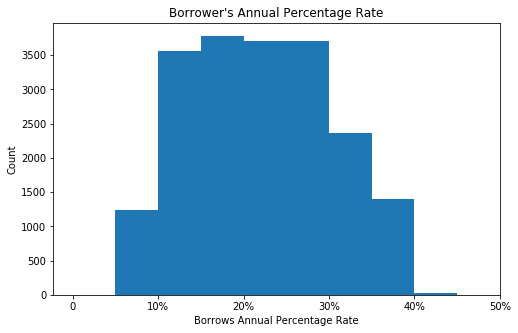

In [21]:
# Plotting the main variable of interest BorrowerAPR
binsize = 5
bins = np.arange(0, previous_borrowers['BorrowerAPR'].max()+binsize, binsize)
#print(bins)
plt.figure(figsize=[8, 5])
plt.hist(data = previous_borrowers, x = 'BorrowerAPR', bins=bins)
plt.xlabel('Borrows Annual Percentage Rate')
plt.xticks([0,10,20,30,40,50],["0","10%","20%","30%","40%","50%"])
plt.ylabel('Count')
plt.title("Borrower's Annual Percentage Rate")
plt.show()

### Borrower's Annual Percentage Rate

The Borrower's APR is the annual interest rate charged on a loan. The graph depicts peak Borrower's APR lies between 12% to around 30%. The bin size shows this distribution is unimodal. There is a small number of borrowers with APR that is greater than 40%. I would like to see the raw data for this because is comparatively as oppose to the other APR percentages.

In [22]:
previous_borrowers[previous_borrowers.BorrowerAPR>40]

,Term,LoanStatus,BorrowerAPR,ProsperRating,Occupation,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,BankcardUtilization,IncomeRange,TotalProsperLoans
2294,36,Completed,40.243,HR,Professional,620.0,639.0,9,30.0,"$25,000-49,999",1.0
18473,36,Completed,41.355,HR,Professional,660.0,679.0,9,0.0,"$100,000+",1.0
20467,36,Completed,41.355,HR,Sales - Retail,640.0,659.0,5,88.0,"$1-24,999",1.0
28838,36,Completed,41.355,HR,Other,620.0,639.0,14,68.0,"$25,000-49,999",1.0
31732,36,Completed,41.355,HR,Executive,600.0,619.0,18,100.0,"$75,000-99,999",1.0
34027,36,Chargedoff,41.355,HR,Executive,620.0,639.0,7,0.0,"$50,000-74,999",1.0
36015,36,Completed,41.355,HR,Professional,640.0,659.0,7,98.0,"$50,000-74,999",3.0
38573,36,Completed,40.243,HR,Professional,620.0,639.0,17,91.0,"$50,000-74,999",1.0
53012,36,Completed,40.315,HR,Sales - Retail,660.0,679.0,17,25.0,"$25,000-49,999",1.0
54181,36,Completed,40.679,E,Other,660.0,679.0,4,96.0,Not employed,2.0


### Borrower's APR

There are no notable anonmalies in the data but the outliers in this case will aid in investigating other features. Particularly, the prosper rating, for those above 40%, it is on the low end.

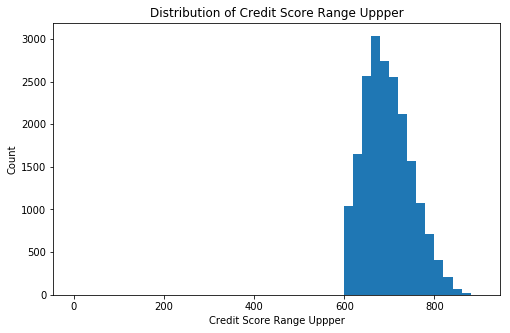

In [23]:
# Plot of Credit Score Range Upper
binsize = 20
bins = np.arange(0, previous_borrowers['CreditScoreRangeUpper'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = previous_borrowers, x = 'CreditScoreRangeUpper', bins=bins)
plt.xlabel('Credit Score Range Uppper')
plt.title('Distribution of Credit Score Range Uppper')
plt.ylabel('Count')
plt.show()

### Credit Score Range Upper
The credit score appears to be unimodal as well. Similarly the vast majority of the lie in a particular range 680 to 730, with the extreme ends having fewer numbers.

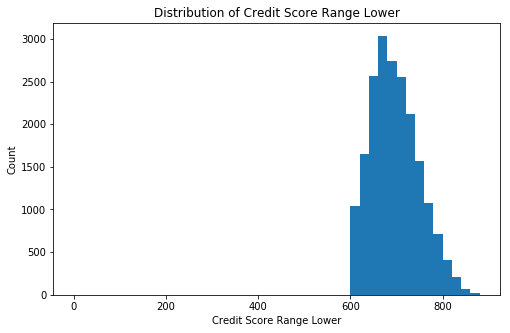

In [24]:
# Plot of Credit Score Range Upper
binsize = 20
bins = np.arange(0, previous_borrowers['CreditScoreRangeLower'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = previous_borrowers, x = 'CreditScoreRangeLower', bins=bins)
plt.xlabel('Credit Score Range Lower')
plt.title('Distribution of Credit Score Range Lower')
plt.ylabel('Count')
plt.show()

### Credit Score Range Lower
The distriubtion of both Credit Score Range Lower and Credit Score Range Upper is an identical unimodal distribution. For further analysis will consider final that is the average of Credit Scores.

In [25]:
previous_borrowers['CreditScoreAvg'] = (previous_borrowers['CreditScoreRangeLower'] + previous_borrowers['CreditScoreRangeUpper'])/2

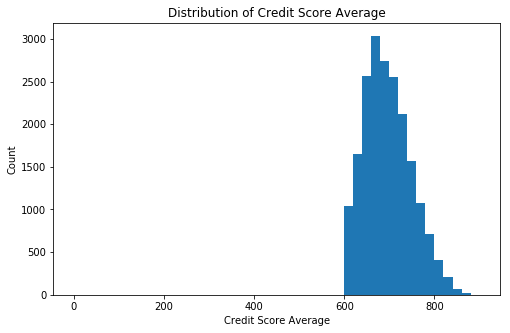

In [26]:
# Plot of Credit Score Average
binsize = 20
bins = np.arange(0, previous_borrowers['CreditScoreAvg'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = previous_borrowers, x = 'CreditScoreAvg', bins=bins)
plt.xlabel('Credit Score Average')
plt.title('Distribution of Credit Score Average')
plt.ylabel('Count')
plt.show()

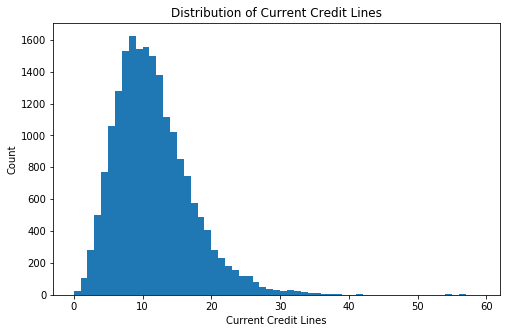

In [27]:
# Plot of Current Credit Lines
binsize = 1
bins = np.arange(0, previous_borrowers['CurrentCreditLines'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = previous_borrowers, x = 'CurrentCreditLines', bins=bins)
plt.xlabel('Current Credit Lines')
plt.title('Distribution of Current Credit Lines')
plt.ylabel('Count')
plt.show()

### Current Credit Lines
The majority of the credit lines are around 10. This is a unimodal graph skewed to the right like the Borrower's APR graph. It tails off to right with values around 25 to 50, a log transform will give a better picture of the distribution for values greater than 25 to 28.

In [28]:
previous_borrowers.CurrentCreditLines.describe()

count    19771.000000
mean        11.022002
std          5.515708
min          0.000000
25%          7.000000
50%         10.000000
75%         14.000000
max         59.000000
Name: CurrentCreditLines, dtype: float64

In [29]:
np.log(previous_borrowers.CurrentCreditLines[previous_borrowers.CurrentCreditLines > 0].describe())

count    9.890807
mean     2.401057
std      1.705851
min      0.000000
25%      1.945910
50%      2.302585
75%      2.639057
max      4.077537
Name: CurrentCreditLines, dtype: float64

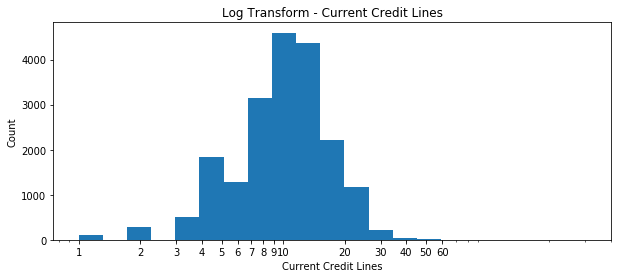

In [30]:
# start with a standard-scaled plot
bins = 30 ** np.arange(0, 1.6+0.1, 0.08)
plt.figure(figsize=[10, 4])
plt.hist(data = previous_borrowers[previous_borrowers.CurrentCreditLines > 0], x = 'CurrentCreditLines', bins=bins)
ticks = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60]
labels = ['{}'.format(v) for v in ticks]
plt.xlabel('Current Credit Lines')
plt.title('Log Transform - Current Credit Lines')
plt.ylabel('Count')
plt.xscale('log')
plt.xticks(ticks, labels)
plt.show()

### Current Credit Lines
Transformed graph shows a steady increase of credit from 1 to 4, a dip at around 5 and 6, increase from 8 to 10 and peaks at around 15. This shows most borrowers are in the range 8 to 15 credit lines. 

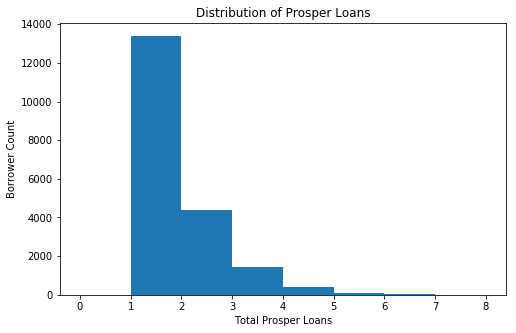

In [31]:
# Plotting Total Prosper Loans
binsize = 1
bins = np.arange(0, previous_borrowers['TotalProsperLoans'].max()+binsize, binsize)
#print(bins)
plt.figure(figsize=[8, 5])
plt.hist(data = previous_borrowers, x = 'TotalProsperLoans', bins=bins)
plt.xlabel('Total Prosper Loans')
plt.title('Distribution of Prosper Loans')
plt.ylabel('Borrower Count')
#plt.xticks([0.0,0.1,0.2,0.3,0.4],["0","10%","20%","30%","40%"])
plt.show()

### Total Prosper Loans
The total prosper loans distribution amongst borrowers. This shows that most borrowers only have 1 loan with prosper. 

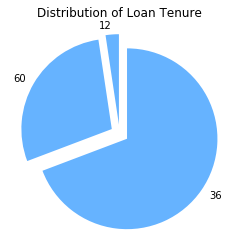

In [32]:
#Plot of Long Duration using the Term attribute
base_color = sb.color_palette()[0]
colors = ['#66b3ff','#66b3ff','#66b3ff']
explode = (0.1, 0.1, 0.1)
sorted_counts = previous_borrowers['Term'].value_counts()
plt.pie(sorted_counts,explode=explode, labels = sorted_counts.index, startangle = 90, counterclock = False,colors=colors);
plt.axis('square')
plt.title("Distribution of Loan Tenure");

### Loan Term
The distribution of loan tenure, the large majority of borrower have loans runing for a duration of 3 years. Followed by 5 years and the least is 1 year. The distribution is in months.

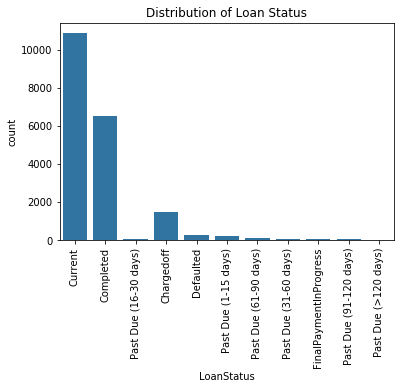

In [33]:
base_color = sb.color_palette()[0]
sb.countplot(data=previous_borrowers, x='LoanStatus',color=base_color);
plt.xticks(rotation=90)
plt.title("Distribution of Loan Status");

### Loan Status
The distribution of loans shows the majority are current followed by completed & charged off. The rest are thinly distributed over 7 categories. 

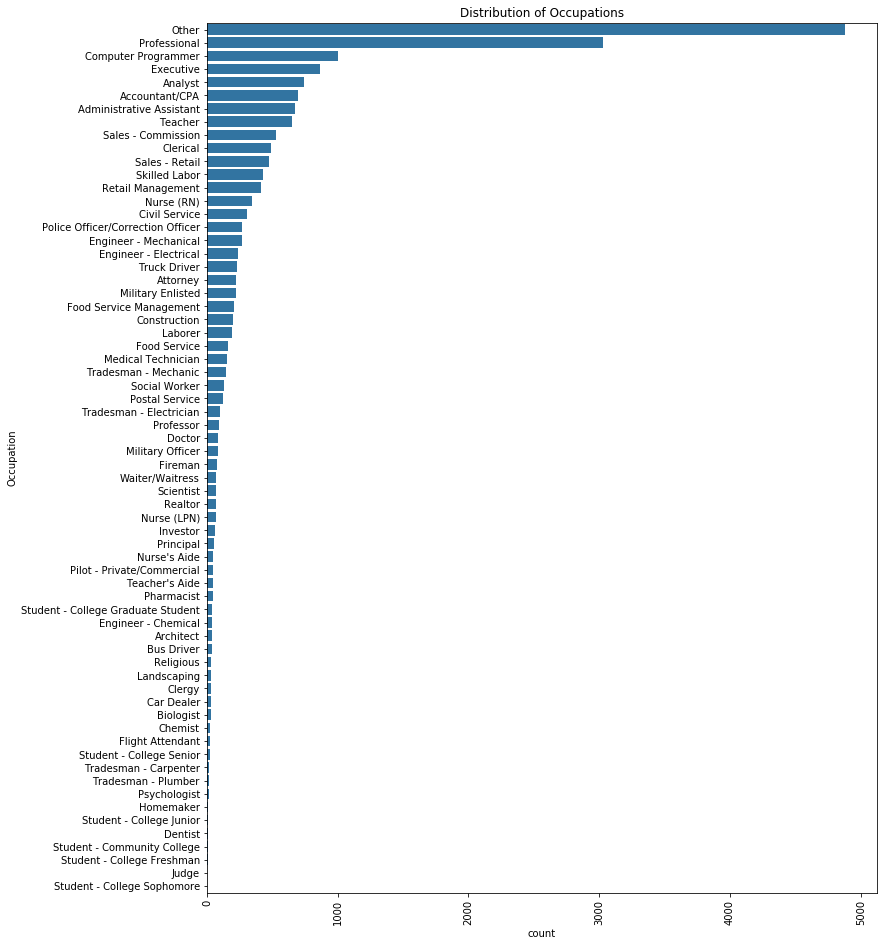

In [34]:
occupation = previous_borrowers.Occupation.value_counts().index #previous_borrowers.Occupation.unique()
plt.figure(figsize=[12, 16])
base_color = sb.color_palette()[0]
sb.countplot(data=previous_borrowers, y='Occupation', color = base_color, order=occupation);
plt.xticks(rotation=90)
plt.title("Distribution of Occupations");

### Occupation
There are a few occupations in this list that appear to be subgroups of one occupation for example Tradesman - Carpenter and Tradesman - Plumber. For the purpose of this analysis broad larger groups are better. These will be transformed using the function below. 

In [35]:
def transform_occupation(occupation_name):
    if occupation_name.find("-") > 0:
        return occupation_name.split("-")[0]
    else: 
        return occupation_name
        
    
previous_borrowers['Occupation_grouped']=previous_borrowers.Occupation.apply(transform_occupation)

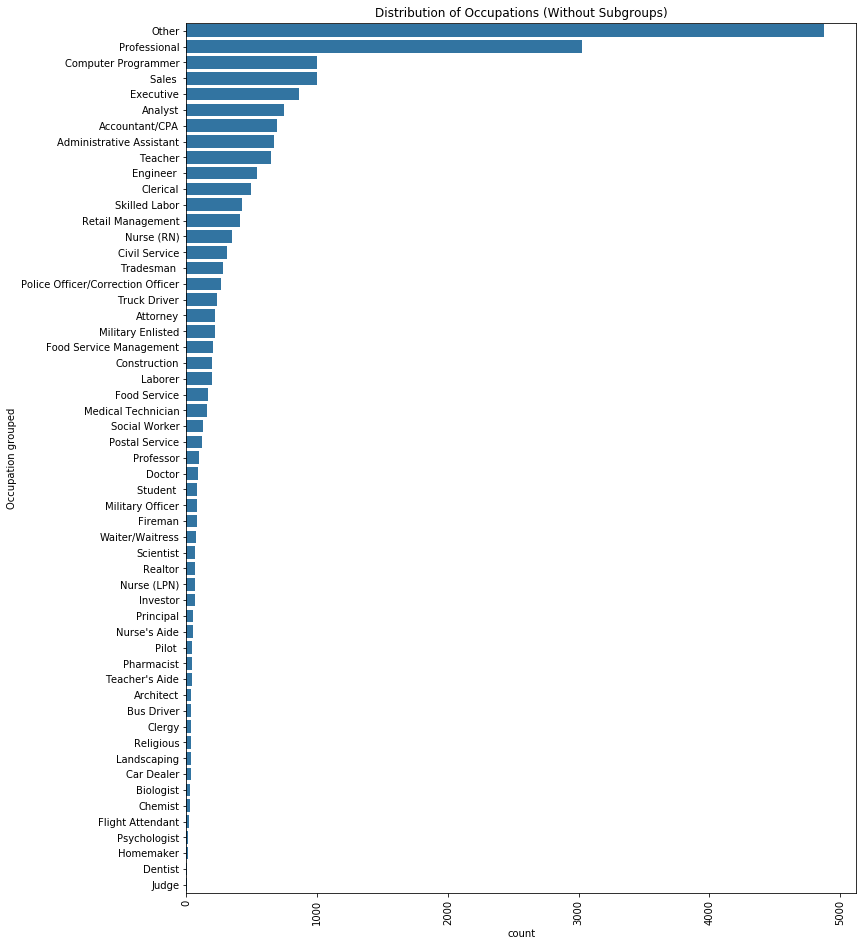

In [36]:
occupation_grouped = previous_borrowers.Occupation_grouped.value_counts().index
#occupation_order = pd.api.types.CategoricalDtype(ordered = True, categories = occupation)
#previous_borrowers['Occupation'] = previous_borrowers['Occupation'].astype(occupation_order)
#previous_borrowers.Occupation.astype()
plt.figure(figsize=[12, 16])
base_color = sb.color_palette()[0]
sb.countplot(data=previous_borrowers, y='Occupation_grouped', color = base_color, order=occupation_grouped);
plt.ylabel('Occupation grouped')
plt.title("Distribution of Occupations (Without Subgroups)");
plt.xticks(rotation=90);

### Occupation
The distribtion of occupation is interesting, here is ordered from the highest to the lowest. Since occupation other & professional are the highest, these make occupation a bit doubtful in terms of it's usefulness to the analysis, other would mean the borrowers couldn't find a fitting option for what they do. Professional is ambigious in a way as the remaining occupations consists professional jobs. The quality of this attribute is doubtful.

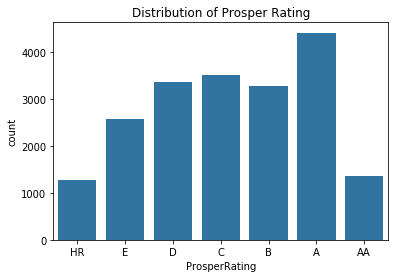

In [37]:
# Plot of Prosper Rating - BarChart
base_color = sb.color_palette()[0]
plt.title("Distribution of Prosper Rating")
sb.countplot(data=previous_borrowers, x='ProsperRating',color=base_color);

### Prosper Rating
The distribution here is unimodal and skewed to the right opposite of Borrower's APR graph. From what has been observed some far, the HR rating featured alot in the loans with a BAPR greater than 40%. The behavior of this feature with BAPR needs to be analysed.

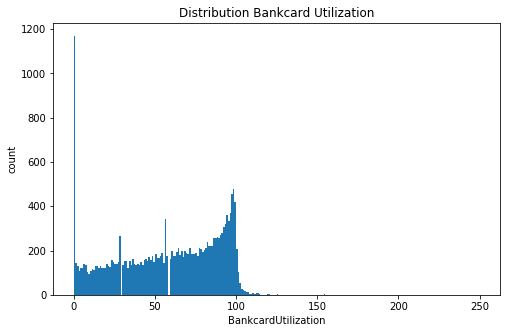

In [38]:
# Plotting Total Prosper Loans
binsize = 1
bins = np.arange(0, previous_borrowers['BankcardUtilization'].max()+binsize, binsize)
#print(bins)
plt.figure(figsize=[8, 5])
plt.hist(data = previous_borrowers, x = 'BankcardUtilization', bins=bins)
plt.xlabel('BankcardUtilization')
plt.title('Distribution Bankcard Utilization')
plt.ylabel('count')
plt.show()

### Bank Card Utilization
The distribution of Bank Card utilization above 100% are outliers as compared to the spread of the other utilization values. 


In [39]:
#There are not a lot of observations above 100%
#In this case value of Bank Card Utilization above 100% should be normal based the values and the counts
print(previous_borrowers["BankcardUtilization"][previous_borrowers.BankcardUtilization>100])
print(previous_borrowers.BankcardUtilization.max())

397       103.0
462       110.0
1319      102.0
1522      113.0
2506      101.0
2558      107.0
2851      101.0
3240      102.0
3357      120.0
3752      122.0
3766      105.0
4664      110.0
5087      108.0
5882      125.0
6180      103.0
6284      101.0
6356      101.0
6506      101.0
6753      101.0
6930      101.0
7051      104.0
7121      101.0
7194      102.0
7486      101.0
7602      102.0
8778      101.0
8832      109.0
8970      105.0
9085      101.0
9107      102.0
          ...  
102282    103.0
102411    101.0
102892    105.0
103053    102.0
103151    120.0
103444    101.0
103848    102.0
104538    101.0
104682    101.0
106031    107.0
106204    109.0
106217    103.0
106294    106.0
106383    101.0
106904    104.0
107037    102.0
107614    154.0
108474    101.0
108994    101.0
109239    120.0
109465    106.0
109608    102.0
109744    102.0
110174    105.0
110731    111.0
110942    101.0
111685    103.0
113200    103.0
113483    102.0
113653    104.0
Name: BankcardUtilizatio

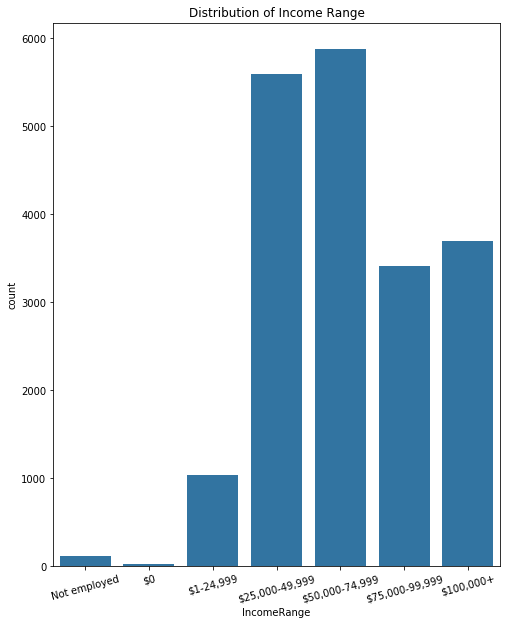

In [40]:
plt.figure(figsize=[8, 10])
plt.title("Distribution of Income Range")
base_color = sb.color_palette()[0]
sb.countplot(data=previous_borrowers, x='IncomeRange', color = base_color);
plt.xticks(rotation=15);

### Income Range
The Income Range highlights the median distribution for most borrowers around 25,000 to 74,999. It will be interesting to see what kind BAPR these categories have.

In [41]:
# Save Previous Borrowers to CSV
previous_borrowers.to_csv('previous_borrowers.csv')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The **Borrower's Annaual Percentage Rate (BAPR)** is a unimodal distribution. With a small percentage of borrowers greater than 40%. Easily identifiable for all these loans was the lower  rating for the Proper rating attribute. 

The **Credit Score Range Upper and Lower** was averaged to get an average picture of the Credit Score rating. The distribution for the **Credit Score Avg** was similar to the visualization of the two attributes it was drived from, which was unimodal. 

**Prosper Rating** - is a unimodal graph that is skewed to the right, a large mumber of borrowers in category A and minority group are in HR and AA. HR represents lowest score and AA highest score. This behaviour is opposite of what we see in BAPR which is skewed to the left.

**Bank Card Utilization** has values great than 100%, these are at least 300 observations. The histogram show that peaks are zero, around 40%, 50% and 100%. The distribution is rather different from what has observed so far it will interesting to see what the colleration is like with BAPR.

The **Income Range** show a unimodal distribution, it will be interesting to how income distributed along side BAPR, that could provide further insight into our investigation.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> **Occupation** has an unusal distributions with most groups falling into Other and Professional. There is a potential that these two groups fit into more meaning groups. Additionally, the first graph provide occupations that had subgroups these where transformed into main growth to really focus on granular groups rather than fine groups.

> **BankCardUtilization** and **BorrowerAPR** were transformed to percentage for easier interpretations.

> **ProsperRating** and **IncomeRange** have been transformed into Category type with Order. (Ordinal data types)

> **CreditScoreAvg**  is a new column with that is an average of **Credit Score Range Upper and Lower**
> **Current Credit lines** produced a unimodal graph, as well, however, the values on the far right where not easily observable, a log transformation was done to have a better understanding of the distribution of how value abouve 40 current credit line where distributed.


## Bivariate Exploration

> Investigate relationships between pairs of variables, our variable of interest is **BorrowerAPR**.

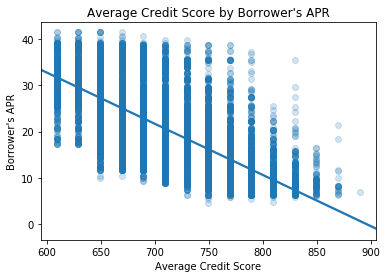

In [42]:
# Scatter plot for CreditScoreAvg and BorrowerAPR
sb.regplot(data = previous_borrowers, x = 'CreditScoreAvg', y = 'BorrowerAPR',truncate=False, scatter_kws={'alpha':1/5});
plt.xlabel('Average Credit Score')
plt.ylabel("Borrower's APR")
plt.title("Average Credit Score by Borrower's APR");

#### CreditScoreAvg and BorrowerAPR
A scatter plot of CreditScoreAvg and BorrowerAPR, shows there is negative relationship between the attributes. 


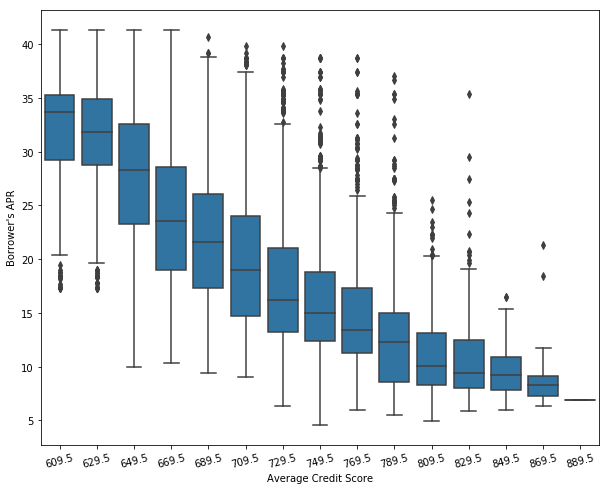

In [43]:
#Box Plot of Credit Score Avg and BorrowerAPR
plt.figure(figsize=[10, 8])
base_color = sb.color_palette()[0]
sb.boxplot(data=previous_borrowers, x='CreditScoreAvg', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=15)
plt.xlabel('Average Credit Score')
plt.ylabel("Borrower's APR");

#### Box Plot of Credit Score Avg and BorrowerAPR

A Box Plot show the negative relationship more clearly, outling the ranges and outliners for CreditScoreAvg.

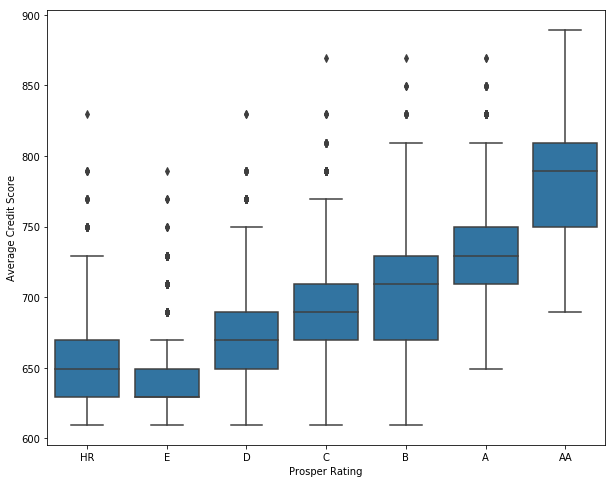

In [44]:
##Box Plot for ProsperRating and Credit Score Average
plt.figure(figsize=[10, 8])
base_color = sb.color_palette()[0]
sb.boxplot(data = previous_borrowers, x = 'ProsperRating', y = 'CreditScoreAvg',color=base_color);
plt.xlabel('Prosper Rating')
plt.ylabel("Average Credit Score");

#### Box Plot for ProsperRating and Credit Score Average
ProsperRating and Credit Score Average are postively collerated. However, there is a difference in rating especially if you inspect Rating E from Prosper, this category is lower and has the most outliers. Credit Score Average overlaps in most instance with Prosper ratings.

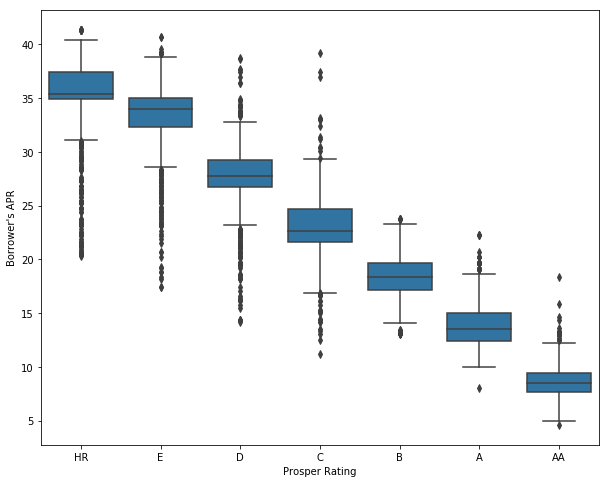

In [45]:
#Box Plot of Prosper Rating and BorrowerAPR
plt.figure(figsize=[10, 8])
base_color = sb.color_palette()[0]
sb.boxplot(data=previous_borrowers, x='ProsperRating', y='BorrowerAPR', color=base_color)
plt.xlabel('Prosper Rating')
plt.ylabel("Borrower's APR");

#### Box Plot of Prosper Rating and BorrowerAPR
Prosper rating produces a similar result to what we have with the credit score. However, they are more outliers for each prosper category.

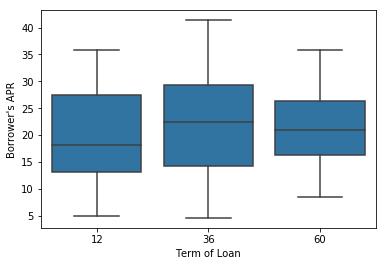

In [46]:
#Box plot for CreditScoreAvg and BorrowerAPR
base_color = sb.color_palette()[0]
sb.boxplot(data = previous_borrowers, x = 'Term', y = 'BorrowerAPR',color=base_color);
plt.xlabel('Term of Loan')
plt.ylabel("Borrower's APR");

#### Scatter plot for CreditScoreAvg and BorrowerAPR
Loans with a duration of 36 months have the highest average BorrowerAPR. The expectation would be the longer the duration the less costly a loan is per year. 

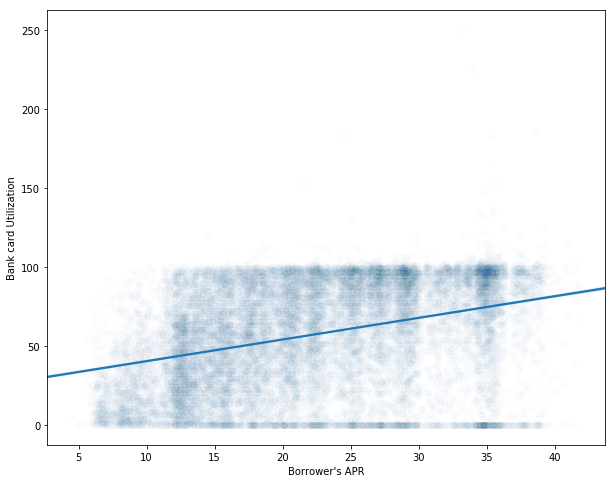

In [47]:
#Scatter plot BankcardUtilization and BorrowerAPR
plt.figure(figsize=[10, 8])
sb.regplot(data = previous_borrowers, y = 'BankcardUtilization', x= 'BorrowerAPR', x_jitter=0.5, scatter_kws={'alpha':1/100});
plt.xlabel("Borrower's APR")
plt.ylabel("Bank card Utilization");

#### Scatter plot BankcardUtilization and BorrowerAPR
Bank Card Utilization show a positive correlation with Borrower's APR, however the distribution is not completely positive for all values of the BankcardUtilization. An additionally plot should provide a clearer picture.

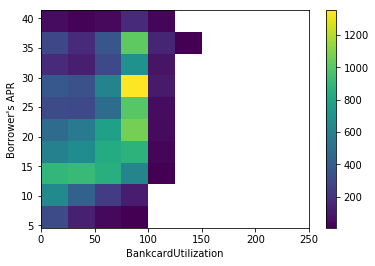

In [48]:
#Heat map plot of BankCardUtilization and BorrowerAPR
plt.hist2d(data = previous_borrowers, x = 'BankcardUtilization', y = 'BorrowerAPR', cmin=5, )
plt.colorbar()
plt.xlabel('BankcardUtilization')
plt.ylabel("Borrower's APR");

#### Heat map plot of BankCardUtilization and BorrowerAPR
The Heat map shows the largely a high Bank Card Utilization is likely going to have a higher APR, with most borrower's in the 20% to 35% representing the borrowers with the highest utilization.

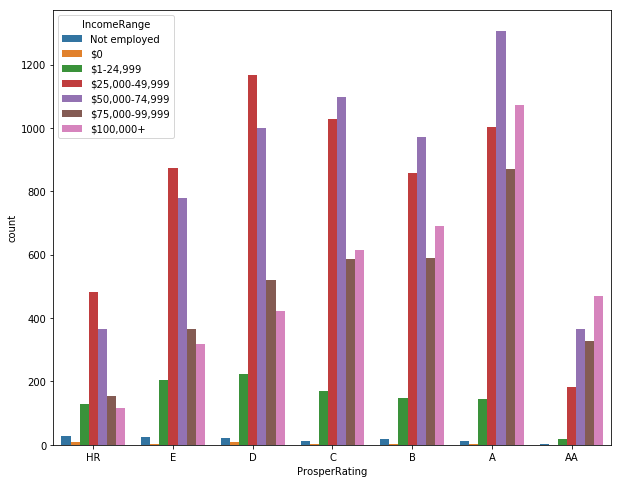

In [49]:
plt.figure(figsize=[10, 8])
sb.countplot(data = previous_borrowers, x = 'ProsperRating', hue = 'IncomeRange');

#### Clustered Bar Char Income Range and Prosper Rating
Prosper Rating is negatively collerated with our main feature of interest. How it relates to Prosper Rating may also provide an indication of the BAPR based on income range. Higher income range show strong presence where there is a better Prosper Rating.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The main feature of interest the Borrower's APR (BAPR) shows a strong negative correlation with credit score average and Prosper Rating. The prosper rating and credit score average are related but when credit score is compared to prosper rating there are generally more overlaps with credit score average. The box plots were use to outline the relationship in a more visual way.

>Bank Card Utilization reflected that there is more of likelihood that customer with higher card utilization would also have a high BAPR.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Interesting relationships observed are with loan tenure/term, that showed medium term loans costing more as compared to short (12 months)  and long(60 months) term loans.

>  There is a relationship between prosper rating and Income range. This relationship show that the high income groups are more strong represented in better proper rating groups.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

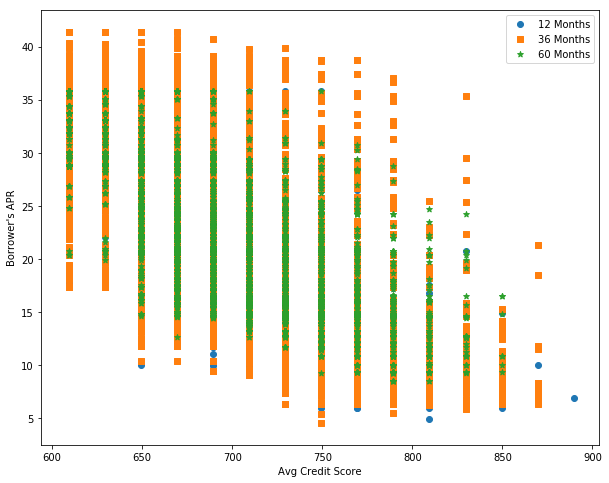

In [50]:
cat_markers = [[12, 'o'],
               [36, 's'],
               [60, '*']]
plt.figure(figsize=[10, 8])
for cat, marker in cat_markers:
    previous_borrowers_cat = previous_borrowers[previous_borrowers['Term'] == cat]
    plt.scatter(data = previous_borrowers_cat, x = 'CreditScoreAvg', y = 'BorrowerAPR', marker = marker)
plt.xlabel('Avg Credit Score')
plt.ylabel("Borrower's APR")
plt.legend(['12 Months','36 Months','60 Months']);

#### Avg Credit Score V Borrower's APR and loan term

> The graph provides value data, it 12 Months largely have low BAPR, is not affected by the score as much as the other loan terms. On average 36 months loan are more costly, but the provide better cost over the rang of Average Credit Score. The Score affect 60 months loan, the better the score the lower the cost of borrowing but on average is it the better choice. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The addition of Term to the graph for Borrower's APR against Average Credit Score has showed has strengthened the fact that loans of 12 Month in length are the least expensive and has added another angle. The credit score does not affected the cost borrowing as much as the it does when the loan tenure increases to 36 or 60 months. On average the 60 months have more favourable rates as compared to loan that are 36 months long.

### Were there any interesting or surprising interactions between features?

> The features interacted as predicted independently although the cost of loans that 12 months appears to  not be affected by the credit score.

## Conclusions
>The investigation focused on the borrowers in the dataset that had loans with prosper in the dataset. The effort began with the wrangling of data. To get an understanding of the data, the shape, data types, observation count, and features were examined. Having extracted the subset of the data with the features of interested selected, tidying up of data was carried out. The cleanup focused on removing attributes with nulls and assigning the correct data types. As part of the tidying up percentage values represented as float values were converted into percentages.

> The investigation started with univariate exploration. All the features were visualized to gain an understanding of the distribution and identified unusual data points and outliers. The main variable of interest was BorrowerAPR, which is the Borrower's Annual Percentage Rate (BAPR) the percentage of the annual cost of borrowing to the borrower. The graph of BAPR was unimodal and highlighted that there are few results that are above 40%. The data above 40% all had a poor Prosper Rating and a below-average Credit Score Range Upper and Lower score. Similarly, the rest of the features were explored. The Current Credit Lines (CurrentCreditLines) required a log-transformed histogram for the readability of the graph. The Credit Score Lower & Upper were averaged to create a new feature CreditScoreAvg. Occupation required transformation to eliminate job subgroups. The majority of the plots produced were unimodal. This factored in the reason for picking variables for focus in the bivariate plots.

> Bivariate plots strongly indicated the Credit Score Average (CreditScoreAvg) and Prosper Rating (ProsperRating - Prosper's internal rating) were negatively correlated. Using Box & Violin plots made this relationship, after an initial scatter plot of CreditScore against BAPR. Bank Card Utilization (BankCardUtilization) heat map showed a high card utilization matched with a high BAPR but this was not very strong. Interestingly,  the tenure of a loan given by the attribute term in months 12, 36, and 60 reflected on average the shortest loan duration had the lowest BAPR. Followed by 60-month-long loans. The loan tenure, Credit Score and BAPR formed the investigation for the multivariate exploration phase.

> The multivariate exploration strengthened the fact that loans of 12-month tenure are the least expensive but in addition to this these loans were not affected by a poor credit score. On average the multivariate plot showed that 36-month tenure had the highest BAPR but also had a better range of BAPR values. On average the 60 months have more favorable rates as compared to loans that are 36 months long.

> Further investigation can be done by including the loan amount and breaking down the occupation's other and professional values.